In [1]:
from __future__ import division # For python 2.*

import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
from sklearn import *
from sklearn.metrics import roc_curve, auc

np.random.seed(0)
%matplotlib inline

X = np.genfromtxt('uci-cs178-f21/X_train.txt', delimiter=',')
Y = np.genfromtxt('uci-cs178-f21/Y_train.txt', delimiter=',')

X,Y = ml.shuffleData(X,Y)
Xtr, Xva, Ytr, Yva = ml.splitData(X, Y, 0.80)

Xte = np.genfromtxt('uci-cs178-f21/X_test.txt', delimiter=',')

Xtr, param = ml.transforms.rescale(Xtr)
Xva, _ = ml.transforms.rescale(Xva,param)
Xte, _ = ml.transforms.rescale(Xte,param)

In [6]:
nBag = 50
mt,nt = Xtr.shape
mv,nv = Xva.shape

tr_predict = np.zeros((mt,nBag))
va_predict = np.zeros((mv,nBag))

classifiers = [ None ] * nBag # Allocate space for learners
for i in range(nBag):
    Xi, Yi  =  ml.bootstrapData(Xtr,Ytr,mt) # select the data at those indices
    classifiers[i] = ml.dtree.treeClassify(Xi, Yi, maxDepth = 25 , minLeaf = 4, minParent = 512, nFeatures = 6)#Train a model on data Xi,Yi
    tr_predict[:,i] = classifiers[i].predict(Xtr)
    va_predict[:,i] = classifiers[i].predict(Xva)

In [7]:
tr_err = []
va_err = []

for i,learners in enumerate([1,5,10,25]):
    tr_predict_mean = np.mean(tr_predict[:,0:learners])
    va_predict_mean = np.mean(va_predict[:,0:learners])
    tr_err.append(np.mean((Ytr - tr_predict_mean)**2))
    va_err.append(np.mean((Yva - va_predict_mean)**2))


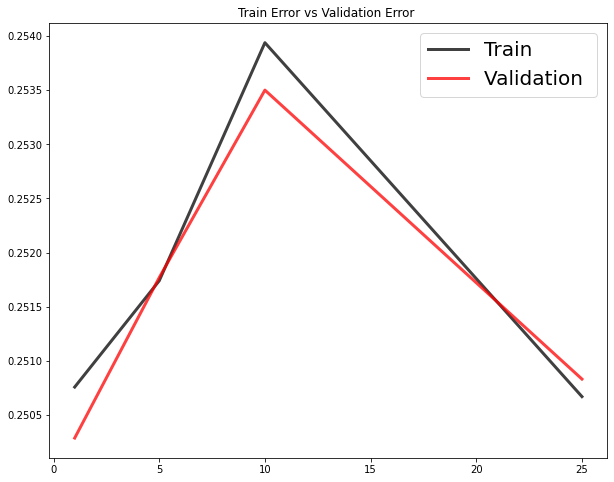

In [8]:
f, ax = plt.subplots(1, 1, figsize=(10, 8))
plt.title("Train Error vs Validation Error ")
plt.plot([1,5,10,25],tr_err,lw=3, color='black', alpha=0.75,label='Train ')
plt.plot([1,5,10,25],va_err,lw=3, color='red', alpha=0.75,label='Validation ')
plt.legend(fontsize=20, loc=0)
plt.show()

In [18]:

nBag = 200
classifiers2 = [ None ] * nBag

mt,nt = Xte.shape

Ye = np.zeros((mt,2))
auc_list = []

for i in range(nBag):
    Xi,Yi = ml.bootstrapData(X,Y,mt) 
    classifiers2[i] = ml.dtree.treeClassify(Xi, Yi, maxDepth = 25 , minLeaf = 4, minParent = 512, nFeatures = 60)
    #Train a model on data Xi,Yi
    auc_list.append(classifiers2[i].auc(Xi,Yi))
    #Train a model on data Xi,Yi
    Ye += classifiers2[i].predictSoft(Xte)
learner = Ye / 25
print(np.mean(auc_list))

In [ ]:

nBag = 1000
classifiers2 = [ None ] * nBag

mt,nt = Xte.shape

Ye = np.zeros((mt,2))
auc_list = []

for i in range(nBag):
    Xi,Yi = ml.bootstrapData(X,Y,mt) 
    classifiers2[i] = ml.dtree.treeClassify(Xi, Yi, maxDepth = 25 , minLeaf = 4, minParent = 512, nFeatures = 60)
    #Train a model on data Xi,Yi
    auc_list.append(classifiers2[i].auc(Xi,Yi))
    #Train a model on data Xi,Yi
    Ye += classifiers2[i].predictSoft(Xte)
learner = Ye / 25
print(np.mean(auc_list))